In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [9]:
from sklearn.datasets import make_classification

In [10]:
X,y = make_classification(n_samples = 10000,n_features =2, n_classes =2, n_clusters_per_class = 2,n_redundant = 0)

In [11]:
X

array([[ 0.7083196 , -1.67727885],
       [-2.38660963, -0.04954319],
       [ 0.29681575, -0.04989298],
       ...,
       [ 2.07384153, -2.73339737],
       [ 1.03862711,  0.87607197],
       [ 0.07610989, -1.99504579]])

In [12]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [13]:
df = pd.DataFrame(X)[0]

<AxesSubplot: xlabel='0', ylabel='1'>

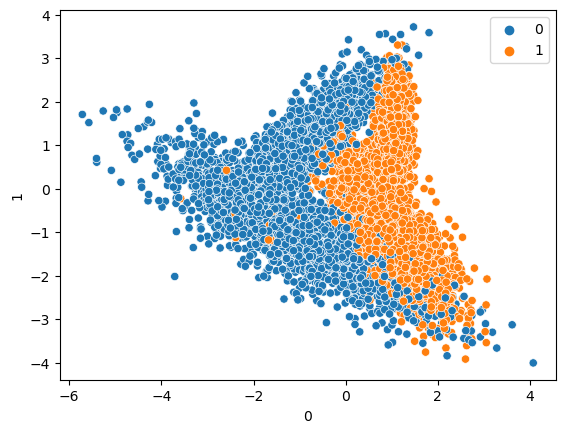

In [14]:
sns.scatterplot(x=df , y = pd.DataFrame(X)[1],hue = y)

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20 , random_state = 42)

In [25]:
from sklearn.svm import SVC

In [26]:
svc = SVC(kernel = 'linear')

In [27]:
svc

SVC(kernel='linear')

In [28]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [29]:
svc.coef_

array([[1.83365577, 0.08827871]])

In [30]:
svc.intercept_

array([-0.46202322])

In [31]:
y_pred = svc.predict(X_test)

In [32]:
y_pred

array([1, 1, 1, ..., 1, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [34]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.909
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       986
           1       0.89      0.94      0.91      1014

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

[[865 121]
 [ 61 953]]


In [35]:
##Hyperparamter tunning
from sklearn.model_selection import GridSearchCV
parameters = {
    'C':[0.1,1,10,100,100],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear']

}

In [37]:
clf = GridSearchCV(svc, param_grid = parameters,refit = True , cv = 5 , verbose = 3)

In [38]:
clf.fit(X_train,y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.913 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.911 total time=   0.7s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.912 total time=   0.6s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.7s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.915 total time=   0.6s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.913 total time=   0.7s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.911 total time=   0.7s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.912 total time=   0.6s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.7s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.915 total time=   0.7s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.913 total time=   0.7s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [39]:
clf.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [40]:
y_pred1 = clf.predict(X_test)

In [41]:
y_pred1

array([1, 1, 1, ..., 1, 0, 0])

In [42]:
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.9085
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       986
           1       0.89      0.94      0.91      1014

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

[[864 122]
 [ 61 953]]
